In [109]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix
import seaborn as sns

In [88]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchbnn 
from torchbnn.modules import linear

In [89]:
iris = load_iris()
X = iris.data  # Input features (4-dimensional)
y = iris.target  # Class labels (3 classes)
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [90]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
#pca = PCA(n_components=2)
#X = pca.fit_transform(X)

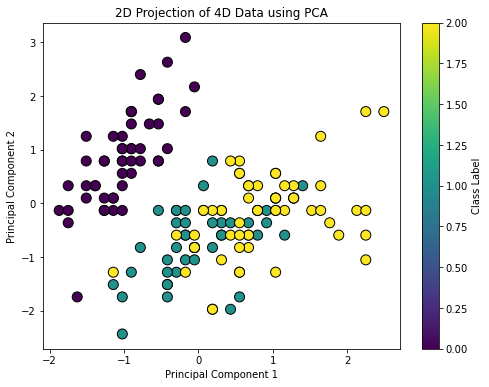

In [91]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.colorbar(label='Class Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Projection of 4D Data using PCA')
plt.show()

In [92]:
X = torch.FloatTensor(X)
y = torch.LongTensor(y)



In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train)

tensor([[-1.7489e+00, -3.6218e-01, -1.3402e+00, -1.3154e+00],
        [-1.1430e+00, -1.2830e+00,  4.2173e-01,  6.5904e-01],
        [ 1.1592e+00, -5.9237e-01,  5.9225e-01,  2.6414e-01],
        [-1.1430e+00,  9.8217e-02, -1.2834e+00, -1.4471e+00],
        [-4.1601e-01, -1.2830e+00,  1.3755e-01,  1.3251e-01],
        [ 5.5333e-01, -1.2830e+00,  7.0592e-01,  9.2230e-01],
        [-2.9484e-01, -8.2257e-01,  2.5122e-01,  1.3251e-01],
        [ 5.5333e-01, -5.9237e-01,  7.6276e-01,  3.9577e-01],
        [ 2.2497e+00, -1.3198e-01,  1.3311e+00,  1.4488e+00],
        [ 2.2497e+00,  1.7096e+00,  1.6722e+00,  1.3172e+00],
        [ 2.1285e+00, -1.3198e-01,  1.6153e+00,  1.1856e+00],
        [ 1.8983e-01, -3.6218e-01,  4.2173e-01,  3.9577e-01],
        [-1.0218e+00, -2.4339e+00, -1.4664e-01, -2.6239e-01],
        [-5.2506e-02, -8.2257e-01,  1.9438e-01, -2.6239e-01],
        [-5.2506e-02, -1.0528e+00,  1.3755e-01,  8.7755e-04],
        [-1.3854e+00,  3.2841e-01, -1.2266e+00, -1.3154e+00],
        

In [94]:
n_neurons = 8
class bnn(nn.Module):
    def __init__(self):
        super(bnn, self).__init__()
        
        self.fc1 = linear.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=4, out_features=n_neurons)
        self.fc2 = linear.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=n_neurons, out_features=n_neurons)
        self.fc3 = linear.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=n_neurons, out_features=3)
            
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [95]:
model = bnn()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [96]:
losses=[]
epochs = 3000 + 1
for epoch in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred,y_train)
    losses.append(loss.detach().numpy())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}')

Epoch [0/3001], Loss: 1.1313
Epoch [100/3001], Loss: 0.2008
Epoch [200/3001], Loss: 0.0538
Epoch [300/3001], Loss: 0.0453
Epoch [400/3001], Loss: 0.0421
Epoch [500/3001], Loss: 0.0508
Epoch [600/3001], Loss: 0.0460
Epoch [700/3001], Loss: 0.0399
Epoch [800/3001], Loss: 0.0375
Epoch [900/3001], Loss: 0.0472
Epoch [1000/3001], Loss: 0.0299
Epoch [1100/3001], Loss: 0.0233
Epoch [1200/3001], Loss: 0.0082
Epoch [1300/3001], Loss: 0.0063
Epoch [1400/3001], Loss: 0.0024
Epoch [1500/3001], Loss: 0.0017
Epoch [1600/3001], Loss: 0.0031
Epoch [1700/3001], Loss: 0.0011
Epoch [1800/3001], Loss: 0.0018
Epoch [1900/3001], Loss: 0.0005
Epoch [2000/3001], Loss: 0.0004
Epoch [2100/3001], Loss: 0.0012
Epoch [2200/3001], Loss: 0.0005
Epoch [2300/3001], Loss: 0.0010
Epoch [2400/3001], Loss: 0.0002
Epoch [2500/3001], Loss: 0.0001
Epoch [2600/3001], Loss: 0.0002
Epoch [2700/3001], Loss: 0.0002
Epoch [2800/3001], Loss: 0.0001
Epoch [2900/3001], Loss: 0.0001
Epoch [3000/3001], Loss: 0.0001


Text(0.5, 0, 'Epochs')

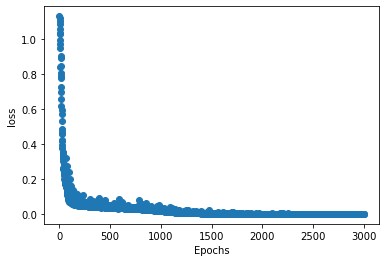

In [97]:
plt.scatter(range(epochs),np.asarray(losses))
plt.ylabel('loss')
plt.xlabel('Epochs')

In [98]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
print(grid)

# Expand grid to 4 dimensions by padding with zeros
grid_4d = np.zeros((grid.shape[0], 4))
grid_4d[:, :2] = grid

tensor([[-2.3700, -2.9339],
        [-2.3600, -2.9339],
        [-2.3500, -2.9339],
        ...,
        [ 2.9700,  3.5860],
        [ 2.9800,  3.5860],
        [ 2.9900,  3.5860]])


In [99]:
n_passes = 100
predictions = []

In [100]:
model.eval()
with torch.no_grad():
    for _ in range(n_passes):
        pred = model(torch.FloatTensor(grid_4d))
        predictions.append(torch.softmax(pred, dim=1).numpy())
        


In [101]:
predictions = np.asarray(predictions)
mean_preds = predictions.mean(axis=0)
mean_preds[0]

array([8.0795980e-05, 2.9185653e-04, 9.9962747e-01], dtype=float32)

In [102]:
mean_preds = mean_preds.argmax(axis=1).reshape(xx.shape)
uncertainty = predictions.std(axis=0).sum(axis=1).reshape(xx.shape)

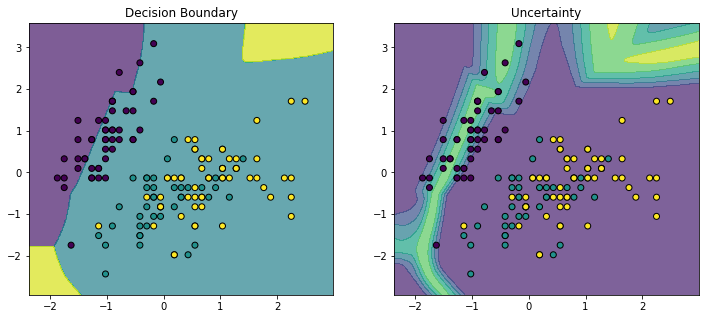

In [103]:
plt.figure(figsize=(12, 5))
    
# Plot decision boundary
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, mean_preds, cmap='viridis', alpha=0.7)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='viridis')
plt.title('Decision Boundary')

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, uncertainty, cmap='viridis', alpha=0.7)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='viridis')
plt.title('Uncertainty')
    
plt.show()

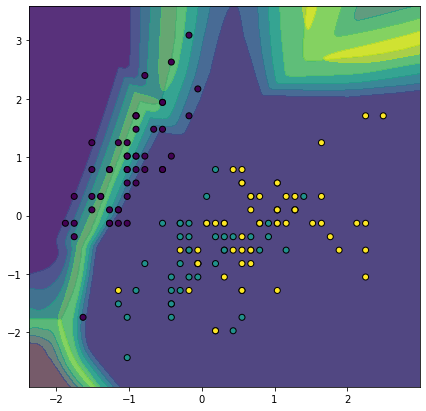

In [104]:
plt.figure(figsize=(7, 7))
plt.contourf(xx, yy, mean_preds, cmap='viridis', alpha=0.7)
plt.contourf(xx, yy, uncertainty, cmap='viridis', alpha=0.7)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='viridis')

In [149]:
def calculate_accuracy_with_uncertainty(model, X, y, threshold=0.5, n_samples=300):
    model.eval()
    accuracies = []
    confusion_matrices = []
    
    with torch.no_grad():
        for _ in range(n_samples):
            outputs = model(X)
            _, predicted = torch.max(outputs, 1)  # Get the class with the highest probability
            cm = confusion_matrix(y.numpy(), predicted.numpy(), labels=[0, 1, 2])
            correct = (predicted == y).float().sum()
            accuracy = correct / y.shape[0]
            accuracies.append(accuracy.item())
    
    accuracies = np.array(accuracies)
    mean_accuracy = accuracies.mean()
    accuracy_uncertainty = accuracies.std()
    
    confusion_matrices = np.array(confusion_matrices)
    mean_confusion_matrix = confusion_matrices.mean(axis=0)
    std_confusion_matrix = confusion_matrices.std(axis=0)
    
    return mean_accuracy, accuracy_uncertainty

[]


/tmp/ipykernel_235941/2493463206.py:21: RuntimeWarning: Mean of empty slice.
  mean_confusion_matrix = confusion_matrices.mean(axis=0)
/home/sai/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/sai/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/sai/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/sai/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[[[10  0  0]
  [ 0  9  1]
  [ 0  0 10]]

 [[10  0  0]
  [ 0  9  1]
  [ 0  0 10]]

 [[10  0  0]
  [ 0  9  1]
  [ 0  0 10]]

 ...

 [[10  0  0]
  [ 0  9  1]
  [ 0  0 10]]

 [[10  0  0]
  [ 0  9  1]
  [ 0  0 10]]

 [[10  0  0]
  [ 0  9  1]
  [ 0  1  9]]]
Accuracy on test set: 96.60% ± 0.47%


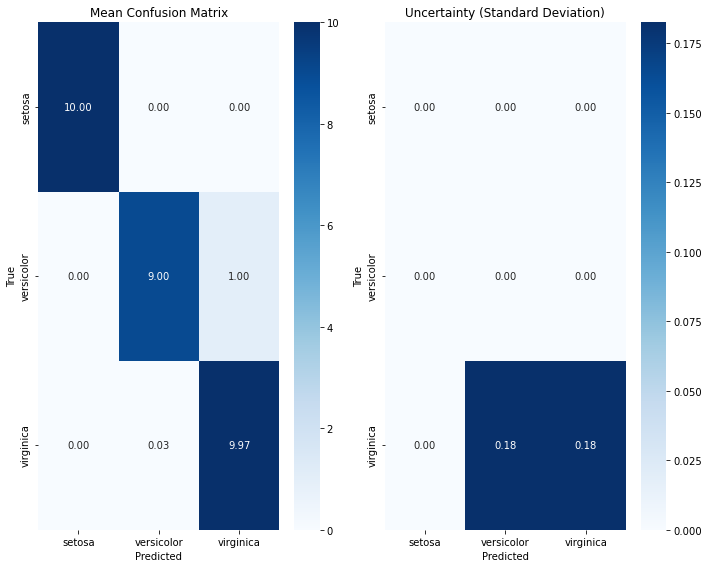

In [158]:
mean_accuracy, accuracy_uncertainty = calculate_accuracy_with_uncertainty(model, X_test, y_test)
mean_cm, std_cm = calculate_confusion_matrix_with_uncertainty(model, X_test, y_test)
print(f'Accuracy on test set: {mean_accuracy * 100:.2f}% ± {accuracy_uncertainty * 100:.2f}%')

class_names = iris.target_names

plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
sns.heatmap(mean_cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Mean Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.subplot(1, 2, 2)
sns.heatmap(std_cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Uncertainty (Standard Deviation)")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.tight_layout()
plt.show()

In [155]:
def calculate_confusion_matrix_with_uncertainty(model, X, y, n_samples=500):
    model.eval()
    confusion_matrices = []
    
    with torch.no_grad():
        for _ in range(n_samples):
            outputs = model(X)
            _, predicted = torch.max(outputs, 1)
            cm = confusion_matrix(y.numpy(), predicted.numpy(), labels=[0, 1, 2])
            confusion_matrices.append(cm)
            
    confusion_matrices = np.array(confusion_matrices)
    print(confusion_matrices)
    mean_confusion_matrix = confusion_matrices.mean(axis=0)
    std_confusion_matrix = confusion_matrices.std(axis=0)
    
    return mean_confusion_matrix, std_confusion_matrix

# Calculate the confusion matrix and its uncertainty
mean_cm, std_cm = calculate_confusion_matrix_with_uncertainty(model, X_test, y_test, n_samples=100)
print(std_cm)



[[[10  0  0]
  [ 0  9  1]
  [ 0  0 10]]

 [[10  0  0]
  [ 0  9  1]
  [ 0  0 10]]

 [[10  0  0]
  [ 0  9  1]
  [ 0  0 10]]

 [[10  0  0]
  [ 0  9  1]
  [ 0  0 10]]

 [[10  0  0]
  [ 0  9  1]
  [ 0  0 10]]

 [[10  0  0]
  [ 0  9  1]
  [ 0  0 10]]

 [[10  0  0]
  [ 0  9  1]
  [ 0  0 10]]

 [[10  0  0]
  [ 0  9  1]
  [ 0  0 10]]

 [[10  0  0]
  [ 0  9  1]
  [ 0  0 10]]

 [[10  0  0]
  [ 0  9  1]
  [ 0  0 10]]

 [[10  0  0]
  [ 0  9  1]
  [ 0  0 10]]

 [[10  0  0]
  [ 0  9  1]
  [ 0  0 10]]

 [[10  0  0]
  [ 0  9  1]
  [ 0  0 10]]

 [[10  0  0]
  [ 0  9  1]
  [ 0  0 10]]

 [[10  0  0]
  [ 0  9  1]
  [ 0  0 10]]

 [[10  0  0]
  [ 0  9  1]
  [ 0  0 10]]

 [[10  0  0]
  [ 0  9  1]
  [ 0  0 10]]

 [[10  0  0]
  [ 0  9  1]
  [ 0  0 10]]

 [[10  0  0]
  [ 0  9  1]
  [ 0  0 10]]

 [[10  0  0]
  [ 0  9  1]
  [ 0  0 10]]

 [[10  0  0]
  [ 0  9  1]
  [ 0  0 10]]

 [[10  0  0]
  [ 0  9  1]
  [ 0  0 10]]

 [[10  0  0]
  [ 0  9  1]
  [ 0  0 10]]

 [[10  0  0]
  [ 0  9  1]
  [ 0  0 10]]

 [[10  0  0]
  [

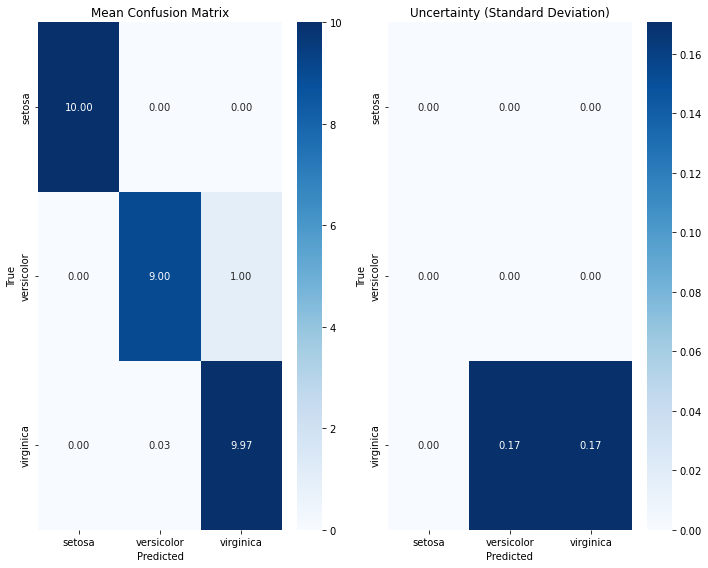

In [147]:
# Class names for the Iris dataset
class_names = iris.target_names

plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
sns.heatmap(mean_cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Mean Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.subplot(1, 2, 2)
sns.heatmap(std_cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Uncertainty (Standard Deviation)")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.tight_layout()
plt.show()